In [23]:
import os
import numpy as np
import pandas as pd

# Path to the specific CSV file
file_path = '/kaggle/input/thesis/databasae/S01G2AllChannels.csv'

# Function to encode EEG signal using BSA
def BSA_encode(S, thresholdBSA):
    B = (S > thresholdBSA).astype(int)  # Create a binary spike train based on the threshold
    S_modified = S * B
    return B, S_modified

# Function to generate spikes and save them
def generate_spikes_and_save(file_path, threshold, output_directory):
    # Load the EEG data
    df = pd.read_csv(file_path)
    channels = ['AF4']

    # Initialize a DataFrame for spikes
    spikes_df = pd.DataFrame()

    for channel in channels:
        eeg_channel_data = df[channel].values
        
        # Apply BSA encoding to the original EEG signal
        spike_train_bsa, _ = BSA_encode(eeg_channel_data, threshold)
        spikes_df[channel] = spike_train_bsa

    # Save the spikes data as a CSV file
    output_file_name = os.path.basename(file_path).replace('.csv', '_spikes.csv')
    output_file_path = os.path.join(output_directory, output_file_name)
    
    # Check if the output directory exists, if not, create it
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    spikes_df.to_csv(output_file_path, index=False)

# Set the BSA threshold to 0.2
threshold = 0.2

# Define the output directory (make sure this exists)
output_directory = '/kaggle/working/BSA/'  # Adjust as necessary

# Generate spikes and save the results
generate_spikes_and_save(file_path, threshold, output_directory)

print(f"Spikes have been saved in {output_directory}")


Spikes have been saved in /kaggle/working/BSA/


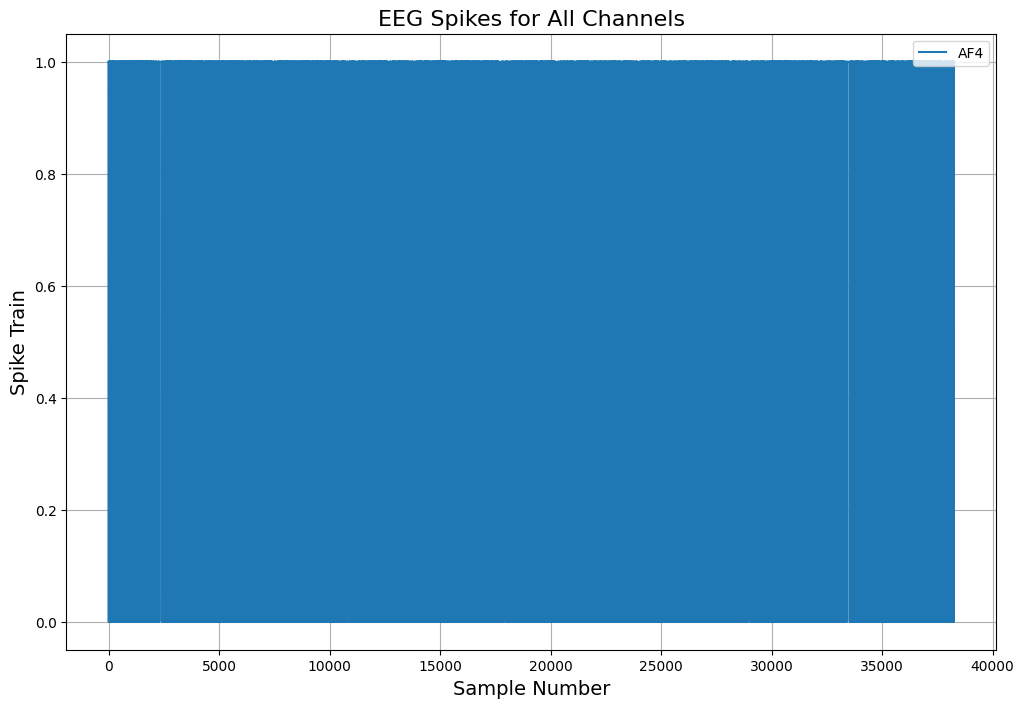

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the spikes data
file_path = '/kaggle/working/BSA/S01G2AllChannels_spikes.csv'
spikes_data = pd.read_csv(file_path)

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot each EEG channel
for channel in spikes_data.columns:
    plt.plot(spikes_data[channel], label=channel)

# Add titles and labels
plt.title('EEG Spikes for All Channels', fontsize=16)
plt.xlabel('Sample Number', fontsize=14)
plt.ylabel('Spike Train', fontsize=14)
plt.legend(loc='upper right')
plt.grid()
plt.show()


Creating RawArray with float64 data, n_channels=1, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   149.418 secs
Ready.
Overwriting existing file.
Writing /kaggle/working/S01G2AllChannels_spikes.fif
Closing /kaggle/working/S01G2AllChannels_spikes.fif
[done]
FIF file saved at: /kaggle/working/S01G2AllChannels_spikes.fif


/tmp/ipykernel_30/3029865322.py:24: RuntimeWarning: This filename (/kaggle/working/S01G2AllChannels_spikes.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(fif_file_path, overwrite=True)


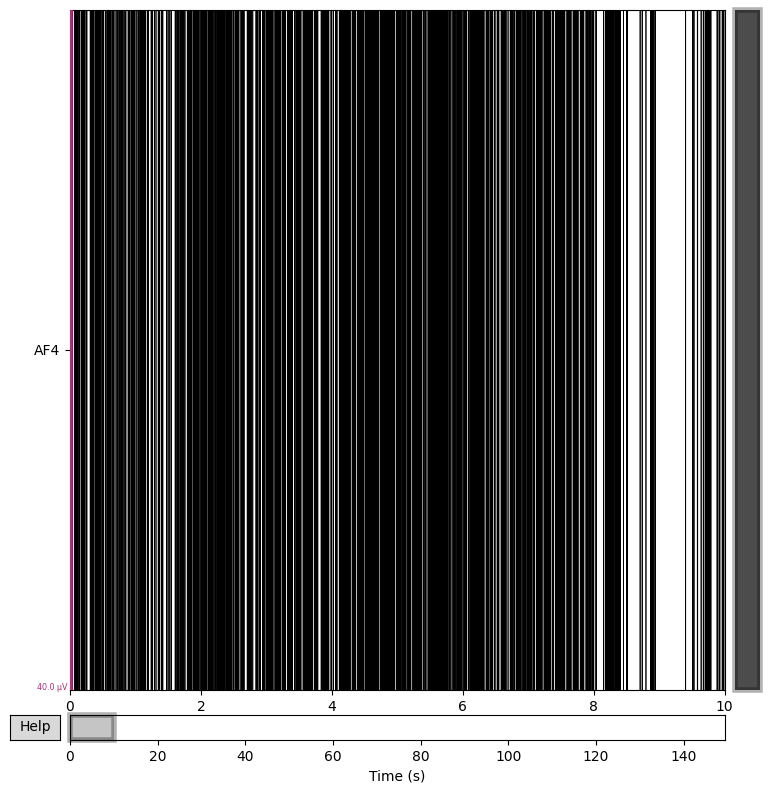

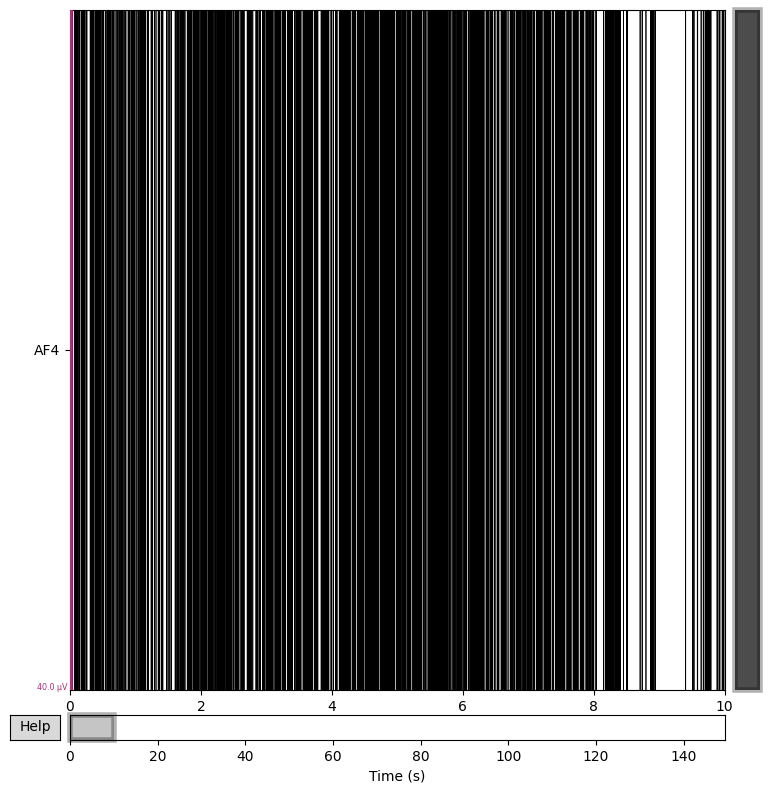

In [25]:
import pandas as pd
import mne
import numpy as np
import os

# Load the spikes data from the CSV file
spikes_df = pd.read_csv('/kaggle/working/BSA/S01G2AllChannels_spikes.csv')

# Convert the DataFrame to a NumPy array
spikes_data = spikes_df.values.T  # Transpose to shape (n_channels, n_times)

# Create an MNE Info object
sfreq = 256  # Sampling frequency, adjust as necessary
n_channels = spikes_data.shape[0]
channel_names = spikes_df.columns.tolist()

info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types=['eeg'] * n_channels)

# Create an MNE Raw object from the data
raw = mne.io.RawArray(spikes_data, info)

# Save the Raw object to FIF format
fif_file_path = '/kaggle/working/S01G2AllChannels_spikes.fif'
raw.save(fif_file_path, overwrite=True)

# Print the path to the saved FIF file
print(f"FIF file saved at: {fif_file_path}")

# Step 3: Plot the spike data
raw.plot(n_channels=n_channels, show=True)


**Rank Order Coding**

In [26]:
import os
import numpy as np
import pandas as pd

# Path to the specific CSV file
file_path = '/kaggle/input/thesis/databasae/S01G2AllChannels.csv'

# Function to encode EEG signal using Rank Order Coding
def ROC_encode(S):
    # Rank the signal values and get the ranks as indices
    ranked_indices = np.argsort(np.argsort(S))
    return ranked_indices

# Function to generate spikes and save them
def generate_spikes_and_save(file_path, output_directory):
    # Load the EEG data
    df = pd.read_csv(file_path)
    channels = ['AF3']

    # Initialize a DataFrame for rank order codes
    roc_df = pd.DataFrame()

    for channel in channels:
        eeg_channel_data = df[channel].values
        
        # Apply Rank Order Coding to the original EEG signal
        roc_values = ROC_encode(eeg_channel_data)
        roc_df[channel] = roc_values

    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Save the ROC data as a CSV file
    output_file_name = os.path.basename(file_path).replace('.csv', '_roc.csv')
    output_file_path = os.path.join(output_directory, output_file_name)
    roc_df.to_csv(output_file_path, index=False)

# Define the output directory (make sure this exists)
output_directory = '/kaggle/working/ROC/'  # Adjust as necessary

# Generate rank order codes and save the results
generate_spikes_and_save(file_path, output_directory)

print(f"Rank Order Codes have been saved in {output_directory}")


Rank Order Codes have been saved in /kaggle/working/ROC/


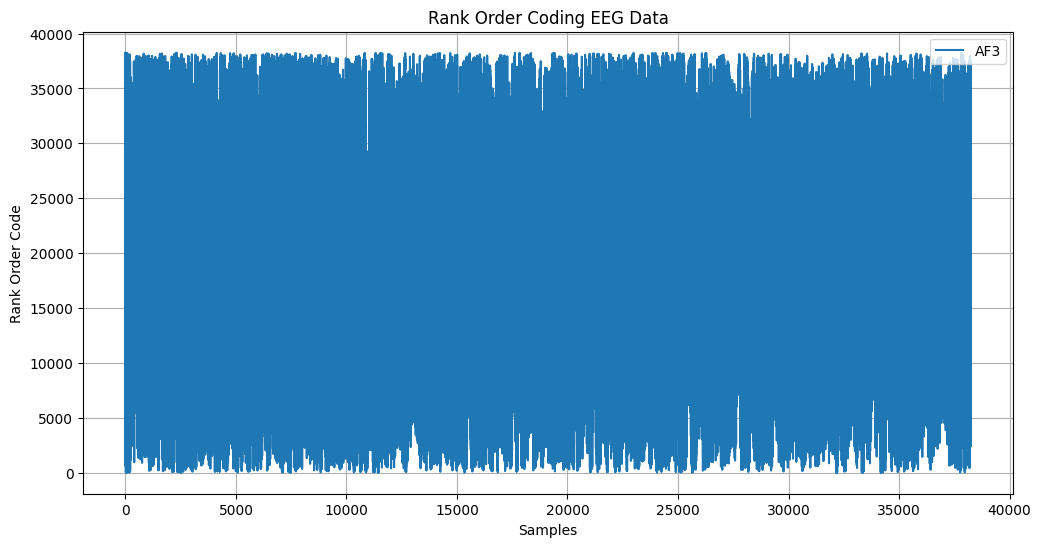

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the ROC data from the CSV file
roc_file_path = '/kaggle/working/ROC/S01G2AllChannels_roc.csv'
roc_data = pd.read_csv(roc_file_path)

# Step 2: Plot the data
plt.figure(figsize=(12, 6))

for channel in roc_data.columns:
    plt.plot(roc_data[channel], label=channel)

plt.title('Rank Order Coding EEG Data')
plt.xlabel('Samples')
plt.ylabel('Rank Order Code')
plt.legend(loc='upper right')
plt.grid()
plt.show()


Creating RawArray with float64 data, n_channels=1, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   153.004 secs
Ready.
Overwriting existing file.
Writing /kaggle/working/ROC/S01G2AllChannels_roc.fif
Closing /kaggle/working/ROC/S01G2AllChannels_roc.fif
[done]


/tmp/ipykernel_30/996873401.py:26: RuntimeWarning: This filename (/kaggle/working/ROC/S01G2AllChannels_roc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(fif_file_path, overwrite=True)


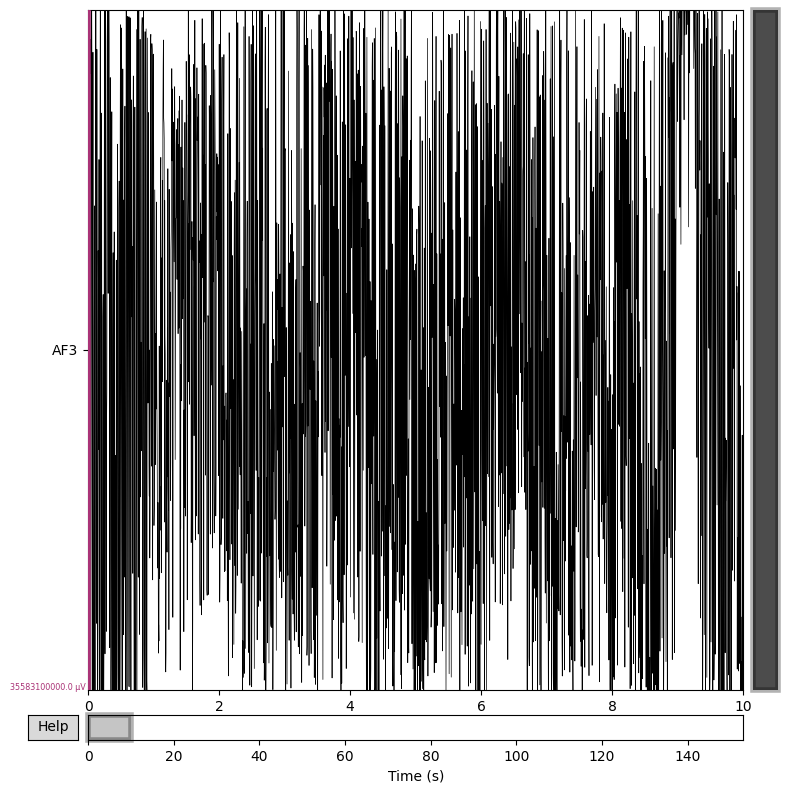

FIF file has been saved at /kaggle/working/ROC/S01G2AllChannels_roc.fif and plotted.


In [28]:
# Step 1: Install MNE if not already installed
!pip install mne

# Step 2: Import necessary libraries
import os
import pandas as pd
import mne
import numpy as np

# Step 3: Load the ROC data from CSV
roc_file_path = '/kaggle/working/ROC/S01G2AllChannels_roc.csv'
roc_data = pd.read_csv(roc_file_path)

# Step 4: Create an MNE Info object
sfreq = 250  # Sampling frequency in Hz (adjust according to your data)
n_channels = roc_data.shape[1]  # Number of channels
ch_names = roc_data.columns.tolist()  # Channel names
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

# Step 5: Create an MNE RawArray
data = roc_data.values.T  # Transpose to get shape (n_channels, n_samples)
raw = mne.io.RawArray(data, info)

# Step 6: Save as FIF file
fif_file_path = '/kaggle/working/ROC/S01G2AllChannels_roc.fif'
raw.save(fif_file_path, overwrite=True)

# Step 7: Plot the data
raw.plot(n_channels=n_channels, scalings='auto', title='Rank Order Coding EEG Data', show=True)

print(f"FIF file has been saved at {fif_file_path} and plotted.")


**Rate Coding**

In [29]:
import os
import numpy as np
import pandas as pd

# Path to the specific CSV file
file_path = '/kaggle/input/thesis/databasae/S02G2AllChannels.csv'

# Function to encode EEG signal using Rate Coding
def rate_encode(S, threshold=0.2):
    # Generate a binary spike train based on the threshold
    spike_train = (S > threshold).astype(int)
    return spike_train

# Function to generate spikes and save them
def generate_spikes_and_save(file_path, output_directory):
    # Load the EEG data
    df = pd.read_csv(file_path)
    channels = ['AF4']

    # Initialize a DataFrame for rate codes
    rate_df = pd.DataFrame()

    for channel in channels:
        eeg_channel_data = df[channel].values
        
        # Apply Rate Coding to the original EEG signal
        rate_values = rate_encode(eeg_channel_data)
        rate_df[channel] = rate_values

    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Save the Rate Coding data as a CSV file
    output_file_name = os.path.basename(file_path).replace('.csv', '_rate.csv')
    output_file_path = os.path.join(output_directory, output_file_name)
    rate_df.to_csv(output_file_path, index=False)

# Define the output directory (make sure this exists)
output_directory = '/kaggle/working/RC/'  # Adjust as necessary

# Generate rate codes and save the results
generate_spikes_and_save(file_path, output_directory)

print(f"Rate Codes have been saved in {output_directory}")


Rate Codes have been saved in /kaggle/working/RC/


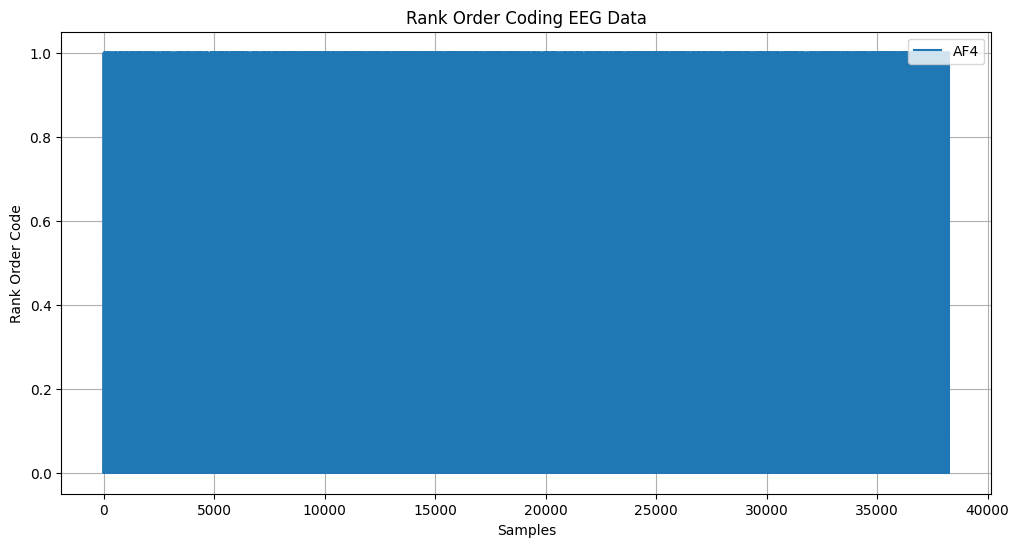

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the ROC data from the CSV file
roc_file_path ='/kaggle/working/RC/S02G2AllChannels_rate.csv'
roc_data = pd.read_csv(roc_file_path)

# Step 2: Plot the data
plt.figure(figsize=(12, 6))

for channel in roc_data.columns:
    plt.plot(roc_data[channel], label=channel)

plt.title('Rank Order Coding EEG Data')
plt.xlabel('Samples')
plt.ylabel('Rank Order Code')
plt.legend(loc='upper right')
plt.grid()
plt.show()


Creating RawArray with float64 data, n_channels=1, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   153.004 secs
Ready.
Overwriting existing file.
Writing /kaggle/working/RC/S02G2AllChannels_rate.fif
Closing /kaggle/working/RC/S02G2AllChannels_rate.fif
[done]


/tmp/ipykernel_30/3247673967.py:25: RuntimeWarning: This filename (/kaggle/working/RC/S02G2AllChannels_rate.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(fif_file_path, overwrite=True)


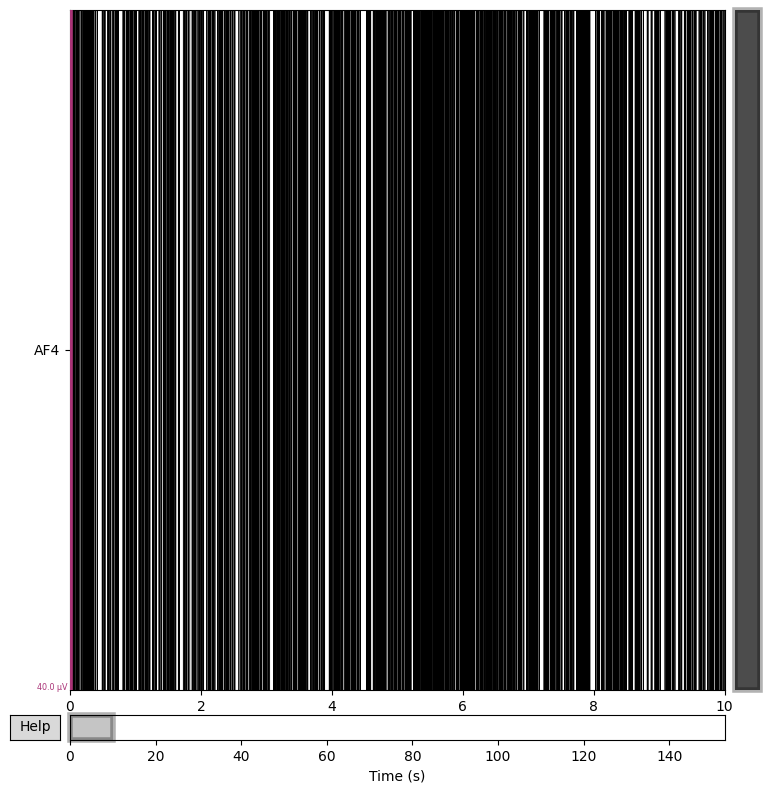

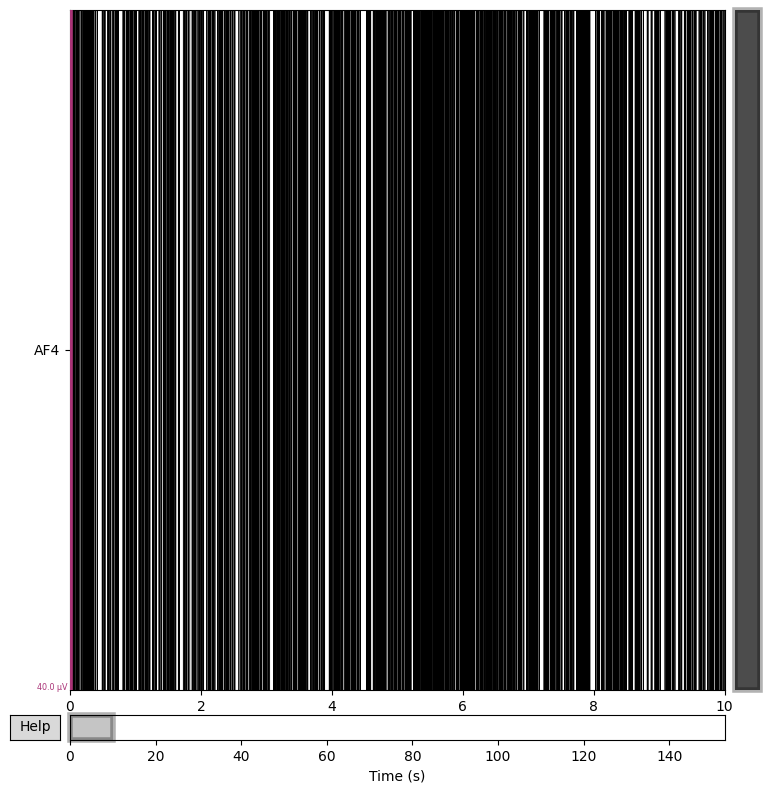

In [32]:
import os
import numpy as np
import pandas as pd
import mne

# Path to the Rate Coding CSV file
roc_file_path = '/kaggle/working/RC/S02G2AllChannels_rate.csv'

# Load the Rate Coding data
rate_df = pd.read_csv(roc_file_path)

# Set up MNE information
channel_names = rate_df.columns.tolist()  # Extract channel names from the DataFrame
sfreq = 250.0  # Sampling frequency (set as per your data)

# Create an MNE Info object
info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types='eeg')

# Create an MNE RawArray from the DataFrame
data = rate_df.values.T  # Transpose to have channels as rows
raw = mne.io.RawArray(data, info)

# Save the Raw object to a FIF file
fif_file_path = '/kaggle/working/RC/S02G2AllChannels_rate.fif'
raw.save(fif_file_path, overwrite=True)

# Plot the data
raw.plot(n_channels=len(channel_names), title='Rate Coding EEG Data', show=True)
